In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('sales.db')
cursor = conn.cursor()

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS sales (id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL)''')

In [4]:
 sample_data = [
    ("Apples", 10, 1.20),
    ("Oranges", 15, 0.80),
    ("Bananas", 7, 0.50),
    ("Apples", 5, 1.20),
    ("Oranges", 10, 0.80),
    ("Bananas", 12, 0.50),
]

In [5]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [6]:
q = """SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [7]:
df = pd.read_sql_query(q, conn)

print("Sales Summary:")
print(df)

Sales Summary:
   product  total_qty  revenue
0   Apples         15     18.0
1  Bananas         19      9.5
2  Oranges         25     20.0


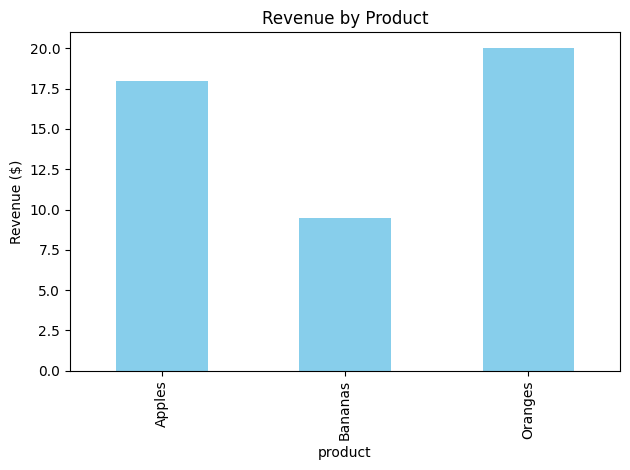

In [8]:
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.ylabel("Revenue ($)")
plt.title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

In [9]:
conn.close()